<a href="https://colab.research.google.com/github/CoGian/Plants_Clustering/blob/master/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Load and preprocess Data Set 

Read all plants save their names in names list and their states in states list.
Some plants ,like agrostis gigantea, have the code 'gl'(Greenland) in their attributes , but stateabr.txt doesn't have the abbreviation 'gl' for Greenland instead it has the abbreviation 'dengl'. So , we will change the abbreviation 'gl' to 'dengl' whenever we see it.

In [0]:
names = []
states = []  
with open(r'/gdrive/My Drive/Plants/data/plants.data',encoding="ISO-8859-1") as f:
  for line in f : 
    record = line.strip().split(',')
    names.append(record[0])
    states_of_plant = record[1:len(record)]
    if 'gl' in states_of_plant:
      states_of_plant[states_of_plant.index('gl')] = 'dengl'
    states.append(states_of_plant)

Print name and states of first plant 

In [4]:
print("Name : " + names[0])
print("States : ", states[0] ) 

Name : abelia
States :  ['fl', 'nc']


Print sizes

In [5]:
print("Size of name list: {:d}".format(len(names)))
print("Size of states list: {:d}".format(len(states)))

Size of name list: 34781
Size of states list: 34781


They have the same size so we are good

Create a set of the states and typecast it back to list because we need index() method

In [6]:
states_set = set()
for states_of_plant in states:
  states_set.update(states_of_plant) 
states_set_list = list(states_set)
print("Size of set of states: {:d}".format(len(states_set_list)))

Size of set of states: 69


The size of set is 69 so we are good because in this Data Set Description it  says that the number of attributes is 70 minus the name attribute is come to 69.

In [0]:
data = [] 
for i in range(len(names)):
  states_of_plant = len(states_set_list) * [0]
  for state in states[i]:
    index = states_set_list.index(state)
    states_of_plant[index] = 1 
  data.append([names[i]]+states_of_plant)

In [8]:
plants_df = pd.DataFrame(data , columns= ['name'] + list(states_set) )
plants_df.head()

,name,mi,yt,in,mo,nt,qc,ny,ks,ar,de,ky,nv,wi,nb,ne,il,on,sd,bc,hi,sc,dengl,fl,or,ct,fraspm,sk,vt,mn,az,nh,md,dc,id,ia,ns,me,nj,pe,nu,wa,la,mb,wv,wy,nf,nc,vi,mt,pa,lb,pr,ok,ri,ms,ca,oh,ut,va,tx,nd,ak,nm,al,ma,ga,co,tn,ab
0,abelia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,abelia x grandiflora,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,abelmoschus,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,abelmoschus esculentus,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,abelmoschus moschatus,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#  Exploratory Data Analysis

Print the first 20 states with the most species of plants

In [9]:
plants_df[plants_df[states_set] == 1 ].count().sort_values(ascending=False).head(20)

ca    11676
tx     8483
or     7028
az     6778
fl     6621
nm     6403
ut     6041
ga     5942
nc     5926
ny     5773
al     5702
nv     5670
wa     5654
va     5638
pa     5474
co     5465
sc     5432
il     5167
la     5154
id     5129
dtype: int64

Print the first 20 states with the least species of plants

In [10]:
plants_df[plants_df[states_set] == 1 ].count().sort_values().head(20)

name         0
nu         979
dengl     1040
fraspm    1210
lb        1433
pe        1841
nt        2024
yt        2100
vi        2185
nf        2188
nd        2682
ns        2844
sk        2846
nb        2856
ak        2969
mb        3023
dc        3080
sd        3185
ne        3281
ri        3295
dtype: int64

Correlation between columns

In [11]:
corr = plants_df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

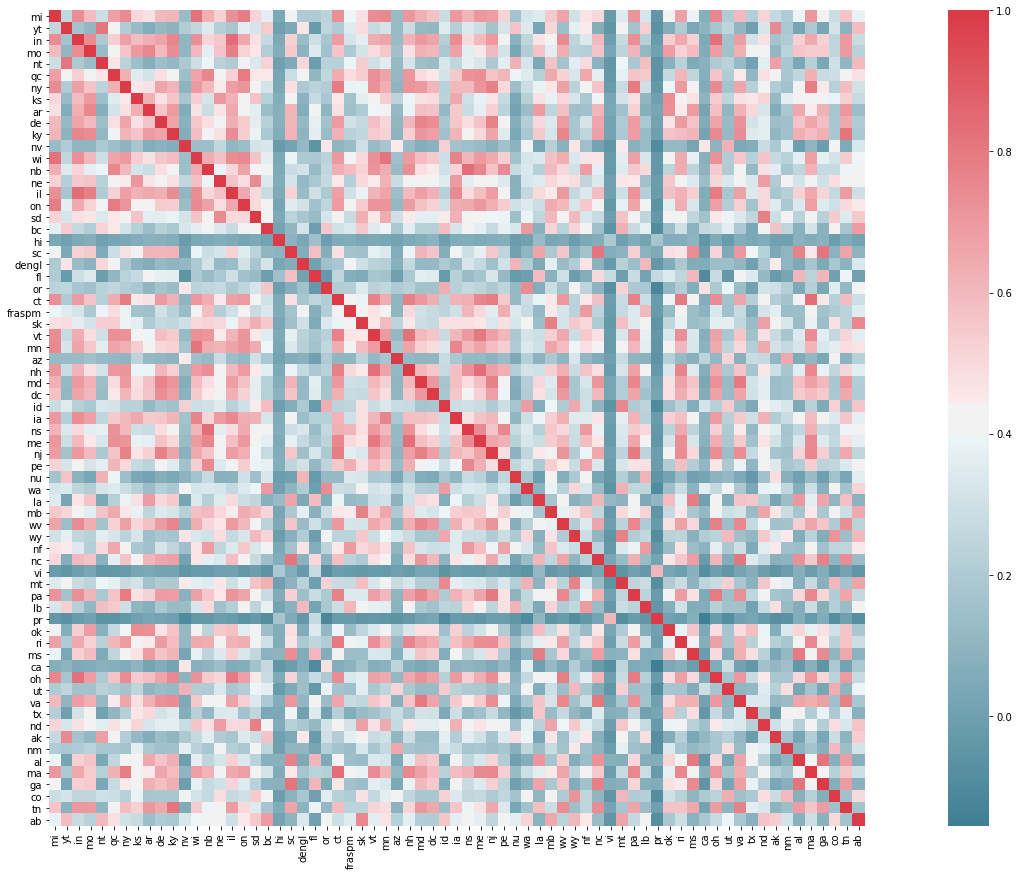

In [12]:
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

# Clustering using elbow method

In [13]:
# calculate distortion for a range of number of cluster
X = plants_df[states_set].values
distortions = []
silhouete_scores = [] 
davies_scores = [] 
calinski_scores = []
labels = [] 
n_clusters = range(2,22)
for i in tqdm(n_clusters):
    km = KMeans(
        n_clusters=i, init='k-means++',
        n_init=10, max_iter=800,
        tol=1e-04, random_state=0
    )
    cluster_labels = km.fit_predict(X)
    labels.append(cluster_labels)
    distortions.append(km.inertia_)
    silhouete_scores.append(silhouette_score(X, cluster_labels))
    davies_scores.append(davies_bouldin_score(X,cluster_labels))
    calinski_scores.append(calinski_harabasz_score(X,cluster_labels))

100%|██████████| 20/20 [07:37<00:00, 22.85s/it]


Plot metrics 

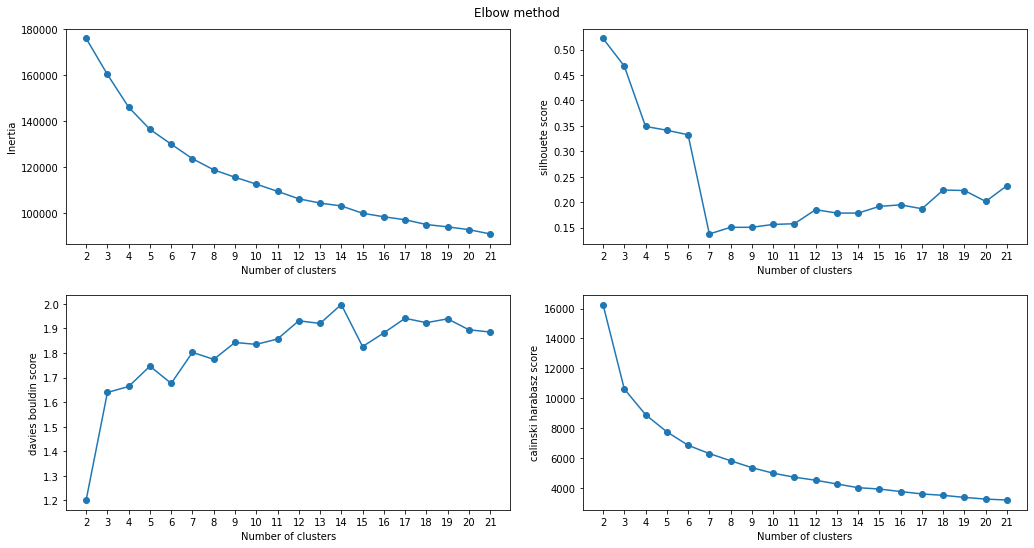

In [14]:
fig, ((ax1, ax2) , (ax3 , ax4)) = plt.subplots(2, 2)
fig.suptitle('Elbow method')
fig.set_size_inches(15,8)
fig.set_tight_layout(tight={'h_pad': 2 , 'w_pad': 2 , 'pad' : 3})

# plot Inertia 
ax1.plot(n_clusters, distortions, marker='o')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia')
ax1.set_xticks(n_clusters)

# plot silhouete score
ax2.plot(n_clusters, silhouete_scores,  marker='o')
ax2.set_xlabel('Number of clusters')
ax2.set_ylabel('silhouete score')
ax2.set_xticks(n_clusters)

# plot davies bouldin score
ax3.plot(n_clusters, davies_scores,  marker='o')
ax3.set_xlabel('Number of clusters')
ax3.set_ylabel('davies bouldin score')
ax3.set_xticks(n_clusters)

# plot  calinski harabasz score
ax4.plot(n_clusters, calinski_scores,  marker='o')
ax4.set_xlabel('Number of clusters')
ax4.set_ylabel('calinski harabasz score')
ax4.set_xticks(n_clusters)

Best n_cluster = 6 

Save cluster labels for n_cluster = 6 

In [0]:
labels_df = pd.DataFrame(plants_df['name'])
labels_df['cluster'] = labels[4]

In [0]:
labels_df.to_csv(r'/gdrive/My Drive/Plants/data/plants_labels.csv')